In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/UpdatedResumeDataSet.csv')

print(data)

         Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]


In [ ]:
# Display all the categories of resumes and their counts
category_counts = data['Category'].value_counts()   # Count the number of unique elements in a column of a Pandas dataframe

print(category_counts)

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


In [ ]:
!pip install seaborn

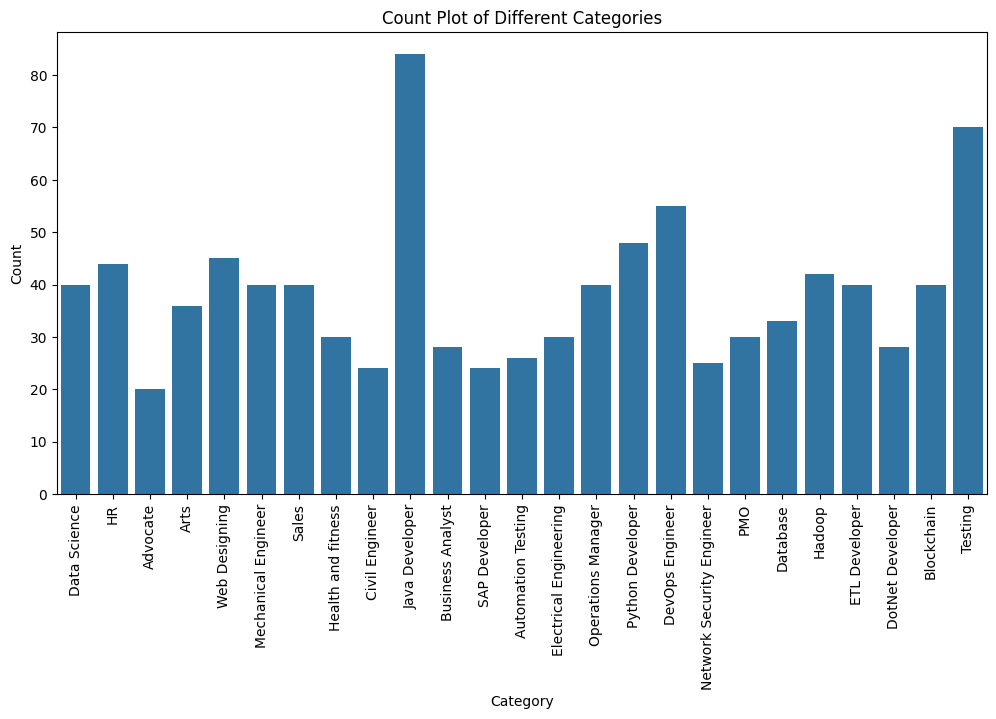

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(12, 6))   # Creates a new figure with a size of 12 inches in width and 6 inches in height
sns.countplot(data=data, x='Category')    # Shows the frequency of each unique category in the specified column
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degree for better readability
plt.title('Count Plot of Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

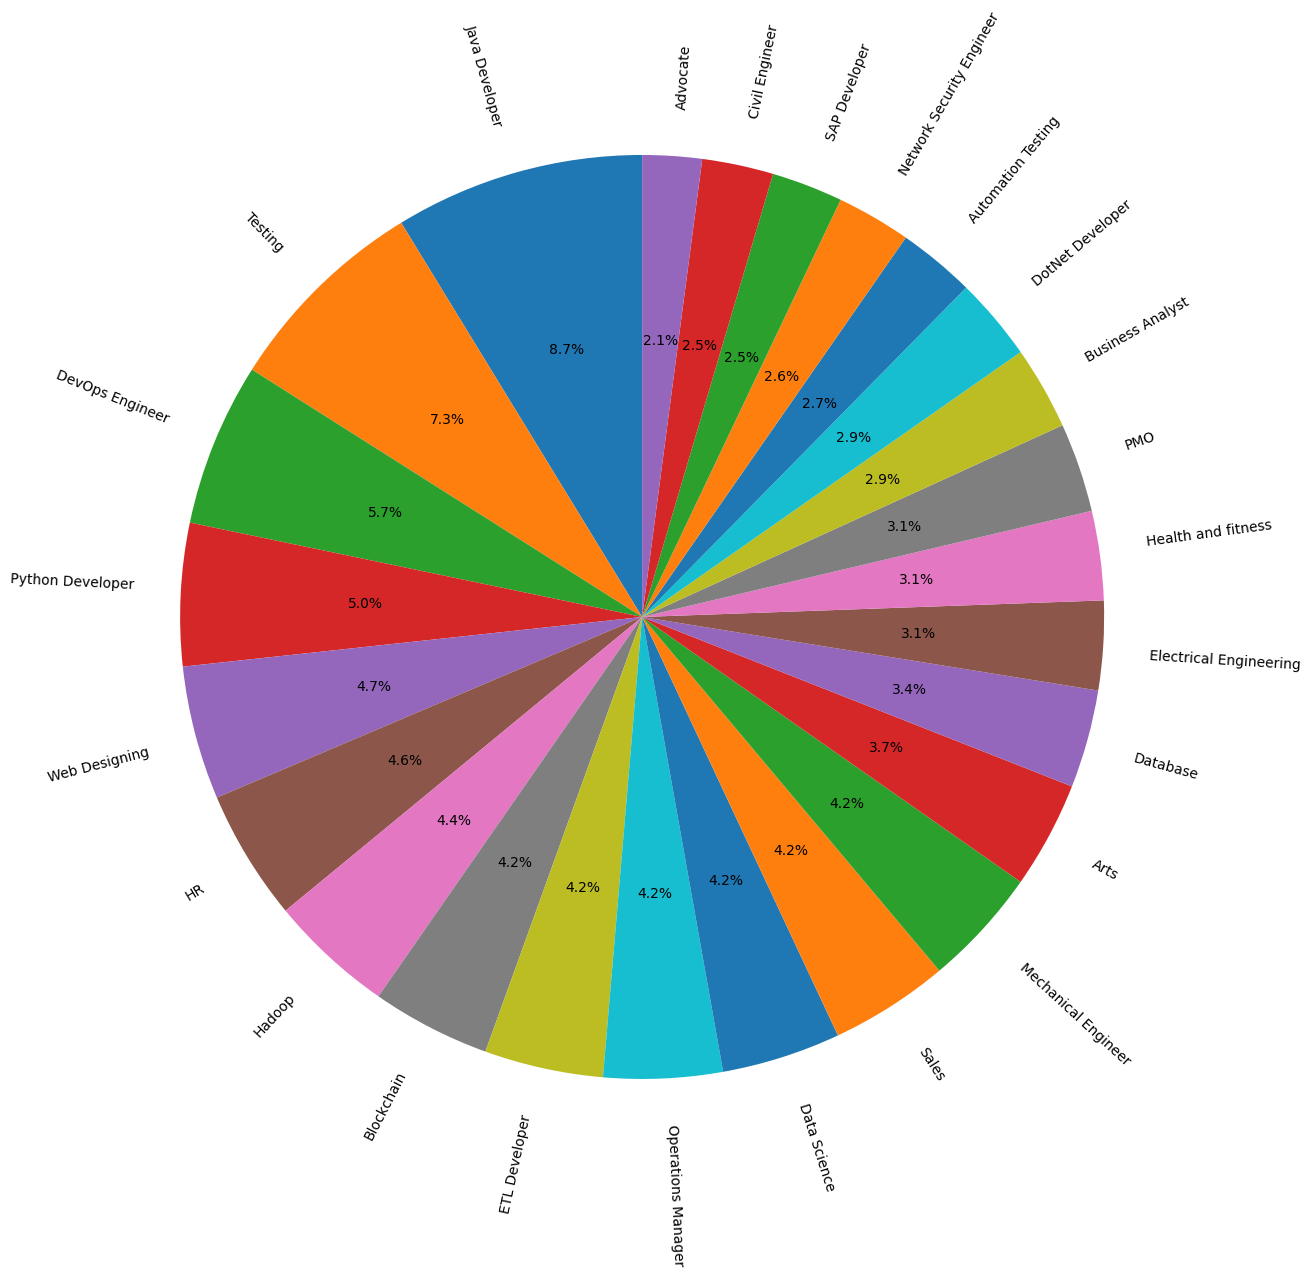

In [ ]:
# Create a pie plot
plt.figure(figsize=(15, 15))
colors = plt.get_cmap('tab10').colors   # Selects a set of colors from the 'tab10' colormap - a predefined set of distinct colors used to differentiate categories in plots
plt.pie(category_counts,  # Counts of different categories in the dataset
        labels=category_counts.index, # The labels for each wedge of the pie chart are set to the unique categories
        autopct='%1.1f%%',  # The % should be displayed on each wedge of the pie chart with 1 dp
        colors=colors,
        startangle=90,rotatelabels=True) # Specifies the angle at which the first wedge of the pie chart starts
plt.show()

In [ ]:
# Convert all the text in the 'Resume' column to lowercase
data['Resume'] = data['Resume'].str.lower()

print(data['Resume'])

0      skills * programming languages: python (pandas...
1      education details \r\nmay 2013 to may 2017 b.e...
2      areas of interest deep learning, control syste...
3      skills â¢ r â¢ python â¢ sap hana â¢ table...
4      education details \r\n mca   ymcaust,  faridab...
                             ...                        
957    computer skills: â¢ proficient in ms office (...
958    â willingness to accept the challenges. â ...
959    personal skills â¢ quick learner, â¢ eagerne...
960    computer skills & software knowledge ms-power ...
961    skill set os windows xp/7/8/8.1/10 database my...
Name: Resume, Length: 962, dtype: object


In [ ]:
import re

def clean_resume_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove RT (Retweet)
    text = re.sub(r'\brt\b', '', text, flags=re.IGNORECASE)

    # Remove Hashtags and Mentions
    text = re.sub(r'#\w+|\@\w+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the function to clean the 'Resume' column and store the result in a new column 'Cleaned_Resume'
data['Cleaned_Resume'] = data['Resume'].apply(clean_resume_text)

print(data[['Resume', 'Cleaned_Resume']])

                                                Resume  \
0    skills * programming languages: python (pandas...   
1    education details \r\nmay 2013 to may 2017 b.e...   
2    areas of interest deep learning, control syste...   
3    skills â¢ r â¢ python â¢ sap hana â¢ table...   
4    education details \r\n mca   ymcaust,  faridab...   
..                                                 ...   
957  computer skills: â¢ proficient in ms office (...   
958  â willingness to accept the challenges. â ...   
959  personal skills â¢ quick learner, â¢ eagerne...   
960  computer skills & software knowledge ms-power ...   
961  skill set os windows xp/7/8/8.1/10 database my...   

                                        Cleaned_Resume  
0    skills programming languages python pandas num...  
1    education details may 2013 to may 2017 be uitr...  
2    areas of interest deep learning control system...  
3    skills â r â python â sap hana â tableau â sap...  
4    education det

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))  # Accesses the list of English stopwords provided by NLTK and converts them into a set

def tokenize_and_remove_stopwords(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stopwords and return only the non-stopword tokens
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words] # Checks for each token in the list of tokens named 'tokens'

    return filtered_tokens

# Apply the function to tokenize and remove stopwords, and store the result in a new column 'Tokenized_Resume'
data['Tokenized_Resume'] = data['Cleaned_Resume'].apply(tokenize_and_remove_stopwords)

print(data[['Cleaned_Resume', 'Tokenized_Resume']].head())

                                      Cleaned_Resume  \
0  skills programming languages python pandas num...   
1  education details may 2013 to may 2017 be uitr...   
2  areas of interest deep learning control system...   
3  skills â r â python â sap hana â tableau â sap...   
4  education details mca ymcaust faridabad haryan...   

                                    Tokenized_Resume  
0  [skills, programming, languages, python, panda...  
1  [education, details, may, 2013, may, 2017, uit...  
2  [areas, interest, deep, learning, control, sys...  
3  [skills, â, r, â, python, â, sap, hana, â, tab...  
4  [education, details, mca, ymcaust, faridabad, ...  


In [ ]:
from nltk.probability import FreqDist

nltk.download('stopwords')
nltk.download('punkt')

# Iterate over each sentence in 'Cleaned_Resume' and tokenize into a list of words
tokenized_resume = [word for resume in data['Cleaned_Resume'] for word in word_tokenize(resume)]

# Create a frequency distribution of words
freq_dist = FreqDist(tokenized_resume)

# Display the most common words and their frequencies
common_words = freq_dist.most_common(10)  # Returns the 10 most common elements and their counts
print("Most Common Words:")
for word, frequency in common_words:
    print(f"{word}: {frequency}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most Common Words:
and: 16680
â: 15153
the: 11485
of: 8777
to: 7598
in: 5519
for: 5255
exprience: 3829
with: 3804
company: 3526


In [ ]:
!pip install wordcloud

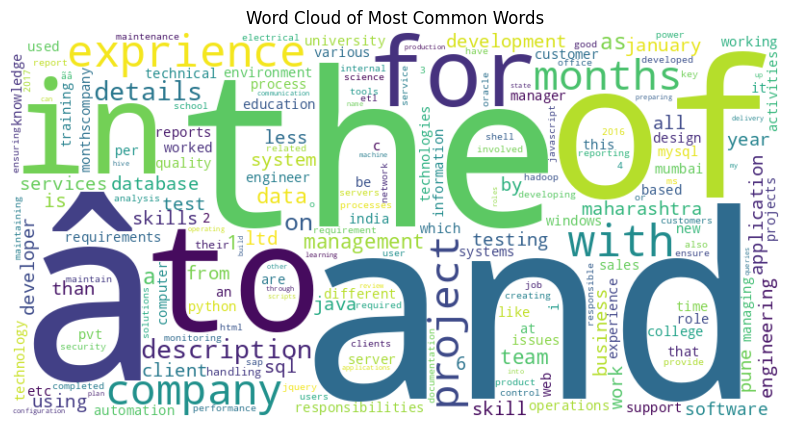

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from the frequency distribution
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis labels and ticks
plt.title('Word Cloud of Most Common Words')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the unique categories in the 'Category' column and transform it into numerical values
data['Category_Num'] = label_encoder.fit_transform(data['Category'])

# Maps each original category to its corresponding numerical value
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Mapping:", category_mapping)

print(data[['Category', 'Category_Num']])

Category Mapping: {'Advocate': 0, 'Arts': 1, 'Automation Testing': 2, 'Blockchain': 3, 'Business Analyst': 4, 'Civil Engineer': 5, 'Data Science': 6, 'Database': 7, 'DevOps Engineer': 8, 'DotNet Developer': 9, 'ETL Developer': 10, 'Electrical Engineering': 11, 'HR': 12, 'Hadoop': 13, 'Health and fitness': 14, 'Java Developer': 15, 'Mechanical Engineer': 16, 'Network Security Engineer': 17, 'Operations Manager': 18, 'PMO': 19, 'Python Developer': 20, 'SAP Developer': 21, 'Sales': 22, 'Testing': 23, 'Web Designing': 24}
         Category  Category_Num
0    Data Science             6
1    Data Science             6
2    Data Science             6
3    Data Science             6
4    Data Science             6
..            ...           ...
957       Testing            23
958       Testing            23
959       Testing            23
960       Testing            23
961       Testing            23

[962 rows x 2 columns]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['Cleaned_Resume'], data['Category_Num'], test_size=0.2,  # 20% of the data will be used for testing, and 80% for training
    random_state=42)  # A random seed for reproducibility

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, # Limits the number of features (words) to the top 5000 by term frequency across the corpus
                                   stop_words='english')  # Removes common English stopwords during tokenization

# Fit the vectorizer on the training data and transform it into a TF-IDF feature matrix
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Apply the learned vocabulary and TF-IDF weights to the test data.
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the resulting feature matrices
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (769, 5000)
Shape of X_test_tfidf: (193, 5000)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes Classifier (MultinomialNB)
nb_classifier = MultinomialNB()

# Train the classifier using the TF-IDF transformed training data ('X_train_tfidf') and the corresponding target labels ('y_train')
nb_classifier.fit(X_train_tfidf, y_train)

# Predicts the target labels for the test set based on the trained model.
y_pred = nb_classifier.predict(X_test_tfidf)

# Display the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9792746113989638

Confusion Matrix:
 [[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0 